# Hackathon

## Credit Risk Assessment in Fintech Industry


# Problem statement

### Import necessary libraries to perform the necessary steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
train = pd.read_csv("train_loan_data.csv")
test = pd.read_csv("test_loan_data.csv")

In [3]:
train.shape,test.shape

((80000, 28), (20000, 27))

In [4]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

(None, None)

In [5]:
display(train.head(2),test.head(2),)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid


,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified


In [6]:
#difference between columns on train and test
train.columns.difference(test.columns)

Index(['loan_status'], dtype='object')

In [59]:
train.nunique(),test.nunique()

(addr_state                 51
 annual_inc               7536
 earliest_cr_line          640
 emp_length                 11
 emp_title               36661
 fico_range_high            38
 fico_range_low             38
 grade                       7
 home_ownership              6
 application_type            2
 initial_list_status         2
 int_rate                  549
 loan_amnt                1373
 num_actv_bc_tl             28
 mort_acc                   28
 tot_cur_bal             65410
 open_acc                   56
 pub_rec                    15
 pub_rec_bankruptcies        8
 purpose                    14
 revol_bal               32971
 revol_util               1080
 sub_grade                  35
 term                        2
 title                    5349
 total_acc                 107
 verification_status         3
 loan_status                 2
 dtype: int64,
 addr_state                 50
 annual_inc               2591
 earliest_cr_line          568
 emp_length             

In [60]:
train.duplicated().sum()

0

In [61]:
train.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [62]:
train['loan_status'].value_counts()

Fully Paid     64030
Charged Off    15970
Name: loan_status, dtype: int64

In [ ]:
##balancing of data is to be performed

In [63]:
train.duplicated().sum()

0

In [64]:
categorical_cols = train.select_dtypes(include= object)

In [65]:
categorical_cols

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
0,CO,Jul-1997,10+ years,Deputy,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Debt consolidation,Source Verified,Charged Off
1,CA,Apr-1987,10+ years,Department of Veterans Affairs,B,RENT,Individual,w,debt_consolidation,B1,36 months,Credit Loan,Verified,Fully Paid
2,FL,Aug-2007,10+ years,Marble polishing,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Debt consolidation,Source Verified,Fully Paid
3,IL,Sep-1980,10+ years,printer,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,Fully Paid
4,MD,Jul-1999,10+ years,Southern Mgmt,F,RENT,Individual,f,debt_consolidation,F5,60 months,Debt Connsolidation,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,Feb-2000,10+ years,Sports Group Manager,G,MORTGAGE,Individual,w,debt_consolidation,G3,60 months,Debt consolidation,Verified,Charged Off
79996,NH,Aug-1995,10+ years,Web Designer,C,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Not Verified,Fully Paid
79997,NY,Apr-2005,< 1 year,Program Officer,B,OWN,Individual,w,debt_consolidation,B4,36 months,Debt consolidation,Source Verified,Fully Paid
79998,TX,Apr-1992,3 years,Sr. Business Analyst,D,MORTGAGE,Individual,w,credit_card,D5,60 months,Credit card refinancing,Source Verified,Fully Paid


In [66]:
numerical_cols = train.select_dtypes(include= np.number)

In [67]:
numerical_cols

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,85000.0,744.0,740.0,18.99,18075.0,1.0,1.0,319479.0,7.0,0.0,0.0,5338.0,93.6,8.0
1,40000.0,724.0,720.0,10.16,8800.0,4.0,0.0,19944.0,5.0,0.0,0.0,19944.0,60.3,12.0
2,60000.0,679.0,675.0,11.47,18000.0,4.0,2.0,23199.0,7.0,0.0,0.0,23199.0,88.5,16.0
3,100742.0,664.0,660.0,9.16,20000.0,4.0,1.0,72651.0,12.0,0.0,0.0,18425.0,69.0,19.0
4,80000.0,669.0,665.0,23.83,35000.0,14.0,7.0,64631.0,23.0,0.0,0.0,34370.0,90.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,664.0,660.0,25.89,25850.0,5.0,4.0,220521.0,12.0,0.0,0.0,20201.0,93.5,42.0
79996,45000.0,684.0,680.0,12.29,6975.0,2.0,2.0,245781.0,7.0,0.0,0.0,6145.0,56.9,14.0
79997,90000.0,724.0,720.0,10.99,7000.0,1.0,3.0,382274.0,9.0,0.0,0.0,3910.0,25.6,26.0
79998,94000.0,669.0,665.0,19.47,18000.0,3.0,3.0,201841.0,16.0,1.0,1.0,11897.0,49.4,48.0


In [68]:
for i in categorical_cols:
    print(i)
    print("the unique count of",i,"is",categorical_cols[i].nunique(),"and they are")
    print(categorical_cols[i].value_counts())
    print('**************************************************************************************************')

addr_state
the unique count of addr_state is 51 and they are
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
NH      373
MS      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: addr_state, dtype: int64
**************************************************************************************************
earliest_cr_line
the unique count of earliest_cr_line is 640 and they are
Sep-2003    547
Aug-2003    545
Aug-2001    544
Oct-2001    541
Sep-2002    539
           ... 
Jun-1958      1
May-1959   

# Exploratory Data Analysis

In [81]:
data=pd.concat([train,test])

In [82]:
data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified,NaN
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified,NaN
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified,NaN
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified,NaN


In [83]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [84]:
data.head(5)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [85]:
cat_cols=data.drop(columns=['emp_title','title','grade','loan_status']).select_dtypes(include=object).columns
num_cols=data.select_dtypes(include=np.number).columns
display(cat_cols,num_cols)

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose', 'sub_grade',
       'term', 'verification_status'],
      dtype='object')

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

<Axes: ylabel='loan_status'>

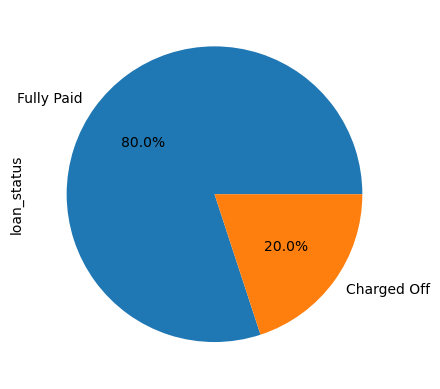

In [74]:
data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='loan_status', ylabel='count'>

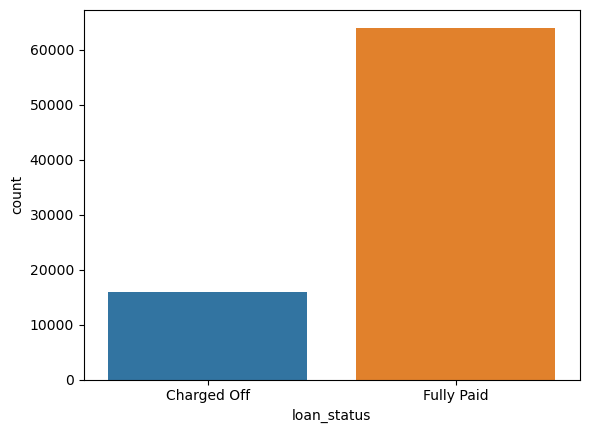

In [75]:
sns.countplot(data=data, x='loan_status')

##### Seems like the output variable(loan_status)data is imbalanced as we can see more number of fully paid rows than the charged off 

In [78]:
data = data.drop(columns=['emp_title','title','grade'])

In [79]:
data.shape

(100000, 25)

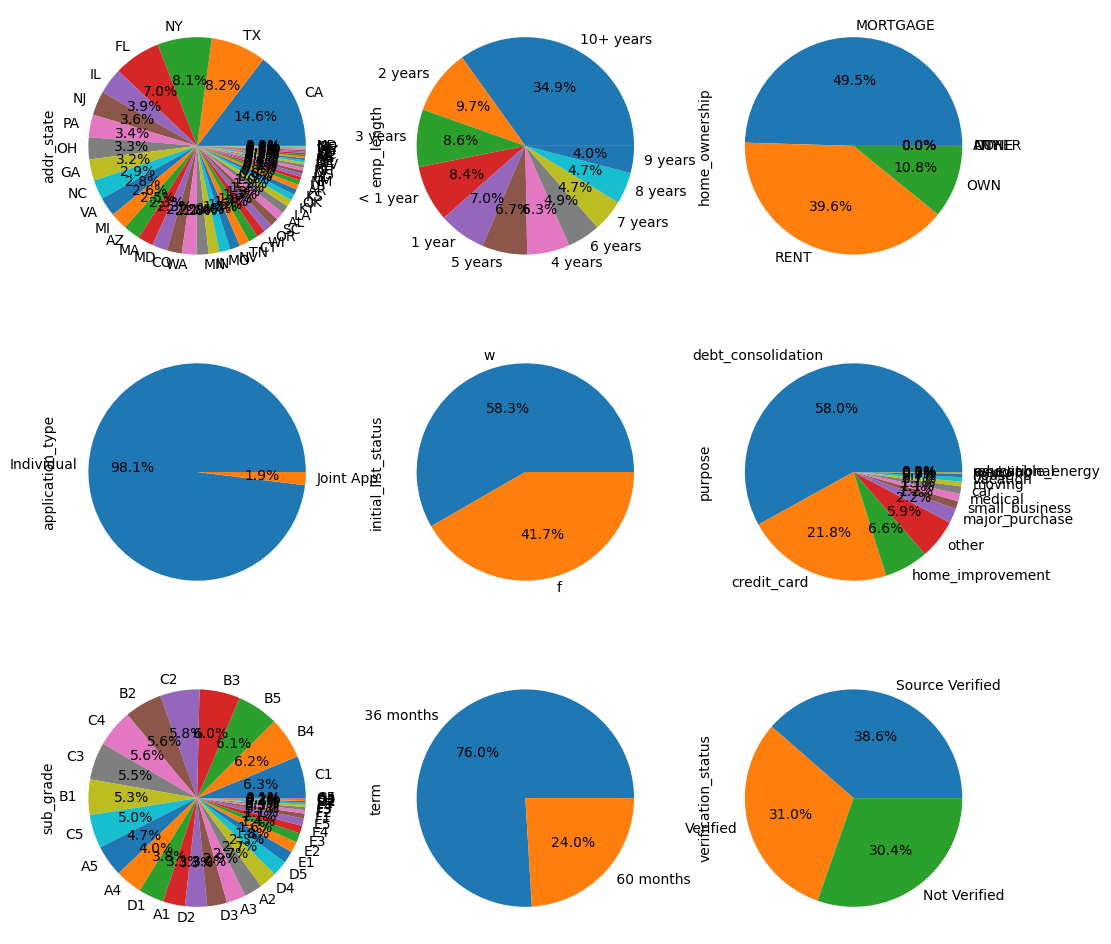

In [87]:
nrows=3
ncols=3
itr=1
plt.figure(figsize=(12,12))

for i in cat_cols:
    plt.subplot(nrows,ncols,itr)
    #plt.subplot(nrows,ncols,itr)
    if i != 'earliest_cr_line':
        a=data[i].value_counts().plot.pie(autopct='%1.1f%%')
        itr+=1
plt.show()

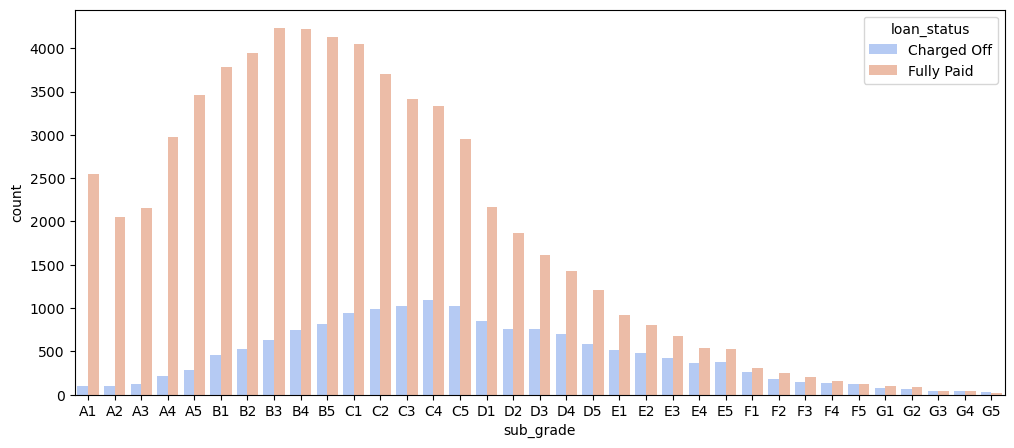

In [88]:
# # unique subgrade
unique_subgrades = sorted(data['sub_grade'].unique())
unique_subgrades
plt.figure(figsize=(12, 5))

sns.countplot(data=data, x='sub_grade', hue='loan_status', order=unique_subgrades, palette='coolwarm');

<Axes: xlabel='grade', ylabel='count'>

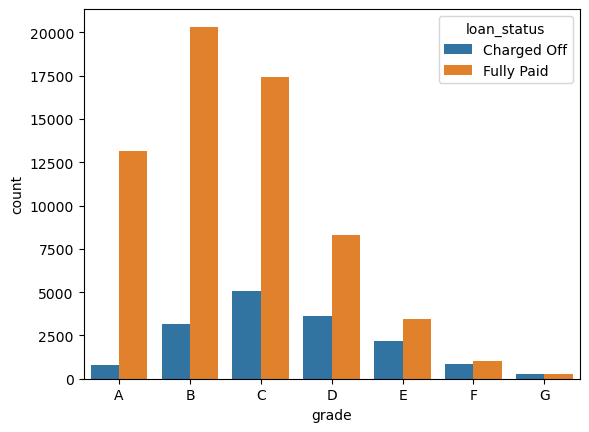

In [89]:
# unique grades
unique_grades = list(data.sort_values('grade')['grade'].unique())
unique_grades
sns.countplot(data=data, x='grade', hue='loan_status', order=unique_grades)

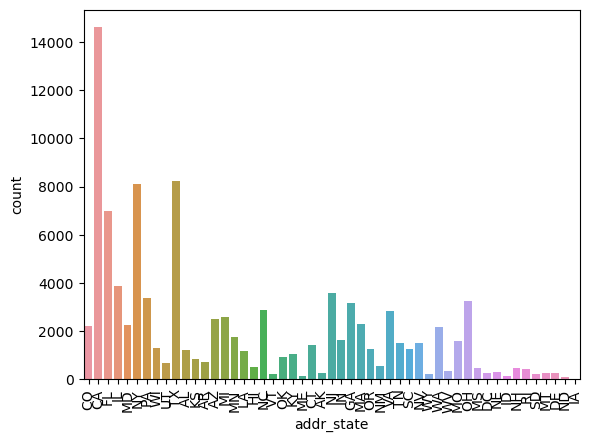

In [90]:
plot=sns.countplot(x='addr_state',data=data)
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

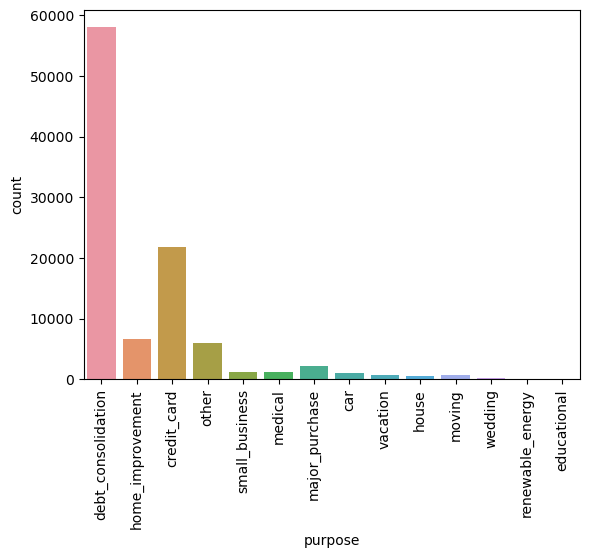

In [92]:
plot=sns.countplot(x='purpose',data=data)
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

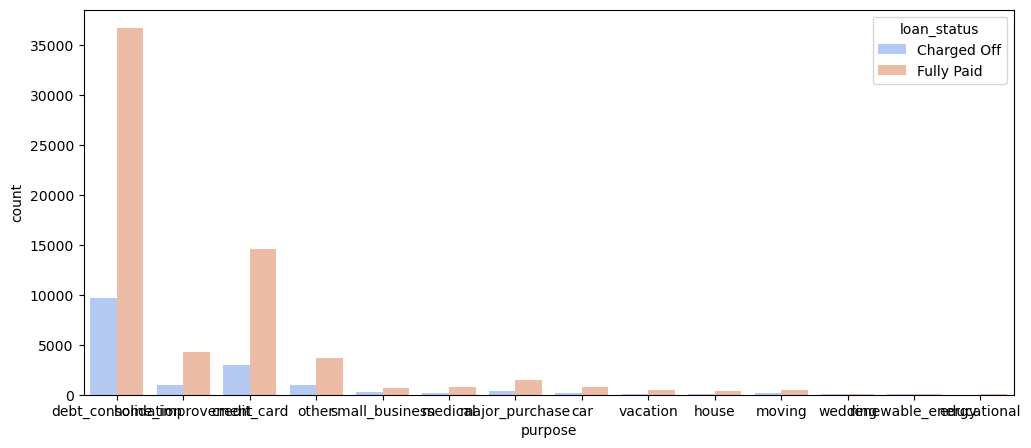

In [94]:
# # unique purpose
unique_purposes = data['purpose'].unique()
plt.figure(figsize=(12, 5))

sns.countplot(data=data, x='purpose', hue='loan_status', order=unique_purposes, palette='coolwarm');

In [101]:
emp_length_order = sorted(data['emp_length'].dropna().unique())

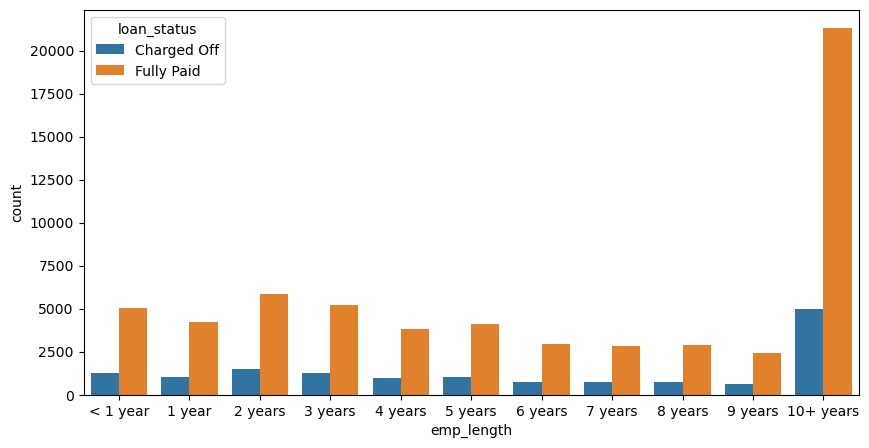

In [103]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='emp_length', order=emp_length_order, hue='loan_status');

loan_status,Charged Off,Fully Paid
term,,
36 months,9787,50963
60 months,6183,13067


array([<Axes: ylabel='Charged Off'>, <Axes: ylabel='Fully Paid'>],
      dtype=object)

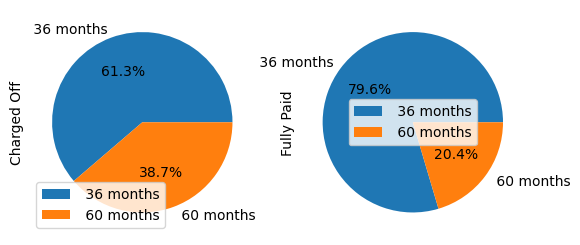

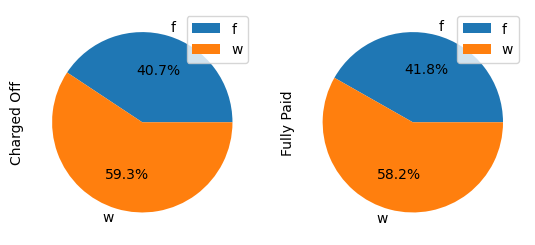

In [105]:
display(pd.crosstab(data['term'],data['loan_status']))
pd.crosstab(data['term'],data['loan_status']).plot.pie(autopct='%1.1f%%',subplots=True)
pd.crosstab(data['initial_list_status'],data['loan_status']).plot.pie(autopct='%1.1f%%',subplots=True)